In [2]:
from keras.models import load_model
model = load_model('model25.h5')


In [3]:
def emotion_analysis(emotions):
#     print(emotions)
    emotions=list(emotions)
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
#     print(emotions)
    print(objects[emotions.index(max(emotions))]) ### final emotion per image 
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
#     print(emotions[y_pos])
    plt.show()

/home/samyak/Documents/webcamera/image/saved_img6.jpg


/home/samyak/.local/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


neutral


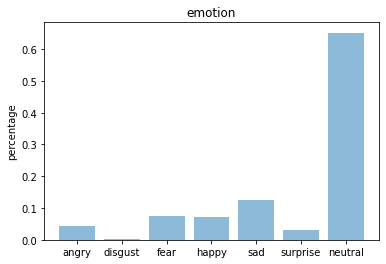

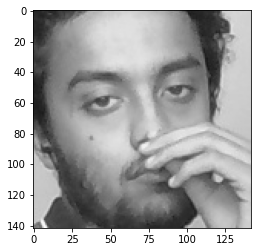

/home/samyak/Documents/webcamera/image/saved_img9.jpg
neutral


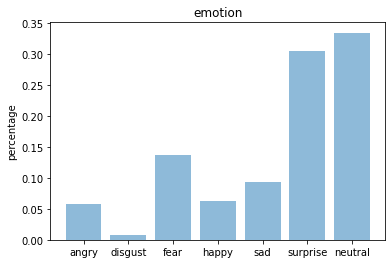

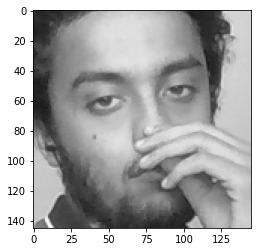

/home/samyak/Documents/webcamera/image/saved_img8.jpg
neutral


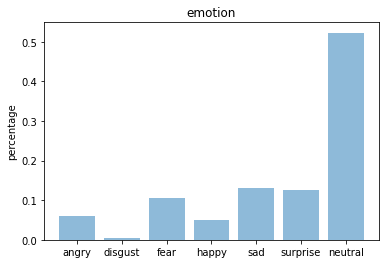

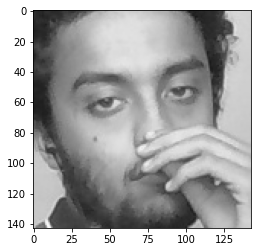

/home/samyak/Documents/webcamera/image/saved_img3.jpg
neutral


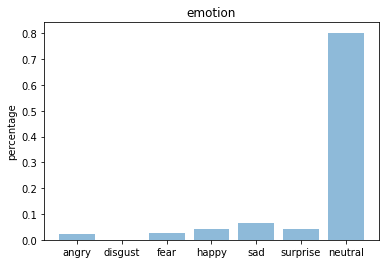

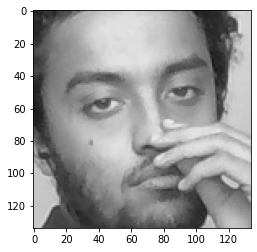

/home/samyak/Documents/webcamera/image/saved_img1.jpg
neutral


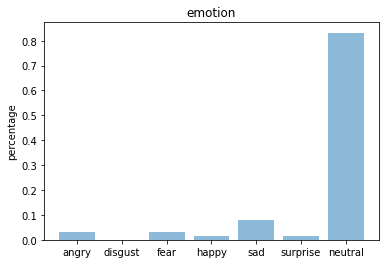

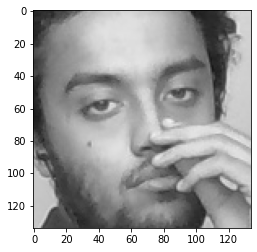

/home/samyak/Documents/webcamera/image/saved_img0.jpg
neutral


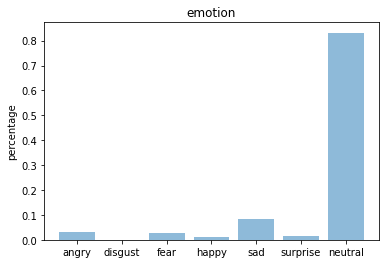

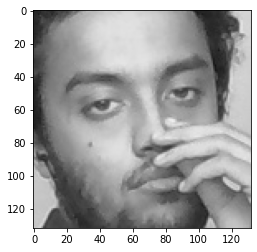

/home/samyak/Documents/webcamera/image/saved_img5.jpg
neutral


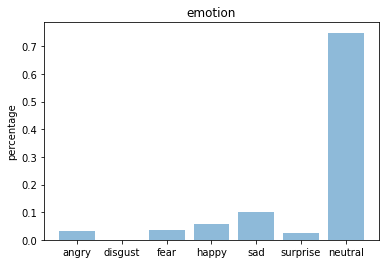

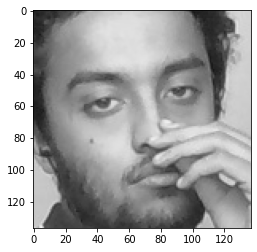

/home/samyak/Documents/webcamera/image/saved_img10.jpg
neutral


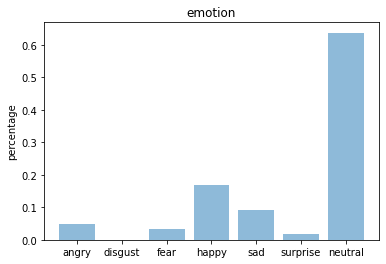

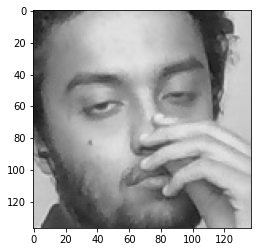

/home/samyak/Documents/webcamera/image/saved_img4.jpg
neutral


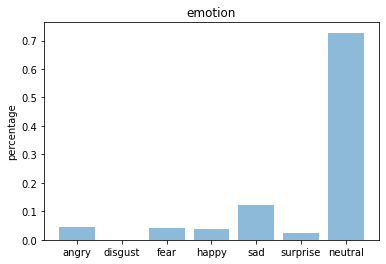

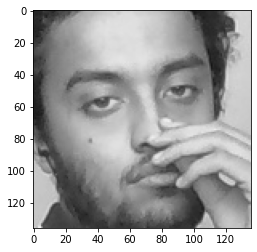

/home/samyak/Documents/webcamera/image/saved_img2.jpg
neutral


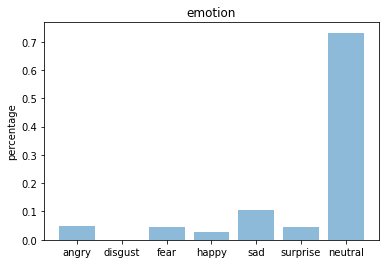

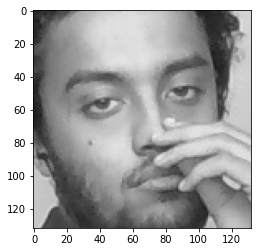

In [4]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt



import os
image_path = "/home/samyak/Documents/webcamera/image"
count=10
for imagey in os.listdir(image_path):
    if(not count):
        break
    count-=1
#     print()
    file = image_path+"/"+imagey
    print(file)
    true_image = image.load_img(file)
    img = image.load_img(file, grayscale=True, target_size=(48, 48))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    x /= 255

    custom = model.predict(x)
    emotion_analysis(custom[0])
    x = np.array(x, 'float32')
    x = x.reshape([48, 48]);

    plt.gray()
    plt.imshow(true_image)
    plt.show()

    
    
    

In [ ]:
import cv2
import time
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
stored_emotions={ "Angry":0,  "Disgusted" :0,  "Fearful" :0,  "Happy" :0,  "Neutral" : 0,  "Sad" : 0, "Surprised" :0 }
    # start the webcam feed
cap = cv2.VideoCapture(0)
t1=time.time()
while True:
        # Find haar cascade to draw bounding box around face
        ret, frame = cap.read()
        if not ret:
            break
        facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)
        #print(f"running for loop {faces}")
        for (x, y, w, h) in faces:
            #print(f"inside for loop {faces}")
            cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
            roi_gray = gray[y:y + h, x:x + w]
            cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
            prediction = model.predict(cropped_img)
            maxindex = int(np.argmax(prediction))
            print(emotion_dict[maxindex])
            stored_emotions[emotion_dict[maxindex]]+=1
            cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        print("for loop ends")
        
#        imgencode = cv2.imencode('.jpg',frame)[1]
#        strinData = imgencode.tostring()
#        yield (b'--frame\r\n'b'Content-Type: text/plain\r\n\r\n'+strinData+b'\r\n')
#        
        cv2.imshow('Video', cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
        cv2.waitKey(1)
      #  if cv2.waitKey(1) & 0xFF == ord('q'):
           # break
        t2=time.time()
        if(round(t2-t1)==10):   
            break
        m=max(stored_emotions.items(),key=lambda x:x[1])

        print(stored_emotions)
        print(m)

In [ ]:
cap = cv2.VideoCapture(0)
